<a href="https://colab.research.google.com/github/Shridat/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('/content/twitter_training.csv')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data=data.drop(['Borderlands'],axis=1)

In [5]:
data.rename(columns={'2401':'ID','Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'Text'},inplace=True)

In [6]:
data.head()

,ID,Sentiment,Text
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...


In [7]:
data.shape

(74681, 3)

In [8]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [9]:
data.nunique()

ID           12447
Sentiment        4
Text         69490
dtype: int64

In [10]:
data.isnull().sum()

ID             0
Sentiment      0
Text         686
dtype: int64

In [11]:
Total = data.isnull().sum().sort_values(ascending=False)
Percentage = ((data.isnull().sum())/(data.isnull().count())).sort_values(ascending=False)
missing_values = pd.concat([Total,Percentage],keys=['Total','Percentage'],axis=1)
missing_values

,Total,Percentage
Text,686,0.009186
ID,0,0.000000
Sentiment,0,0.000000


In [12]:
data = data.dropna(axis=0)

In [13]:
data.reset_index(inplace=True)

In [14]:
data.isnull().sum()

index        0
ID           0
Sentiment    0
Text         0
dtype: int64

In [16]:
df = data.loc[:30000]

In [17]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [28]:
ps=PorterStemmer()
corpus=[]


In [29]:
for i in range(len(data)+1):
  text = re.sub('[^a-zA-Z]',' ',df['Text'][i])
  text = text.lower()
  text = text.split()
  text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)

KeyError: ignored

In [30]:
corpus[:10]

['come border kill',
 'im get borderland kill',
 'im come borderland murder',
 'im get borderland murder',
 'im get borderland murder',
 'spent hour make someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg',
 'spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi wf jg',
 'spent hour someth fun know huge borderland fan maya one favorit charact',
 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg',
 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X = tv.fit_transform(corpus).toarray()

In [34]:
Y = df['Sentiment']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [39]:
pred = model.predict(x_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Negative'], dtype='<U10')

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
acc = accuracy_score(y_test,pred)
print(acc)

0.7607065489085153


Text(0.5, 1.0, 'Confusion Matrix')

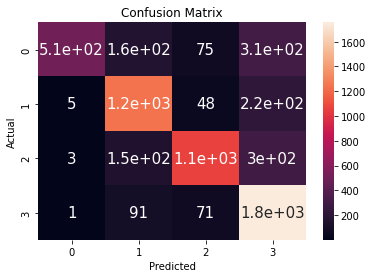

In [49]:
cf = confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True,annot_kws={'size': 15})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")